# Store Sales Data 

This dataset is comprised of 5 csv files which are imported below. The EDA and preprocessing are done using pandas, seaborn, numpy, and matplotlib. 

# Libraries: 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

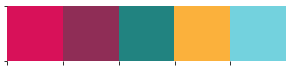

In [2]:
my_color_palette = ["#d81159","#8f2d56","#218380","#fbb13c","#73d2de"]
sns.palplot(sns.color_palette(my_color_palette))
sns.despine(left=True, bottom=True)

# DataSet:

In [3]:
df_holiday_events = pd.read_csv("holidays_events.csv",parse_dates=['date'])
df_oil = pd.read_csv("oil.csv",parse_dates=['date'])
df_stores = pd.read_csv('stores.csv')
df_test = pd.read_csv('test.csv',parse_dates=['date'])
df_train = pd.read_csv('train.csv',parse_dates=['date'])

In [4]:
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [5]:
df_stores.type.value_counts()

D    18
C    15
A     9
B     8
E     4
Name: type, dtype: int64

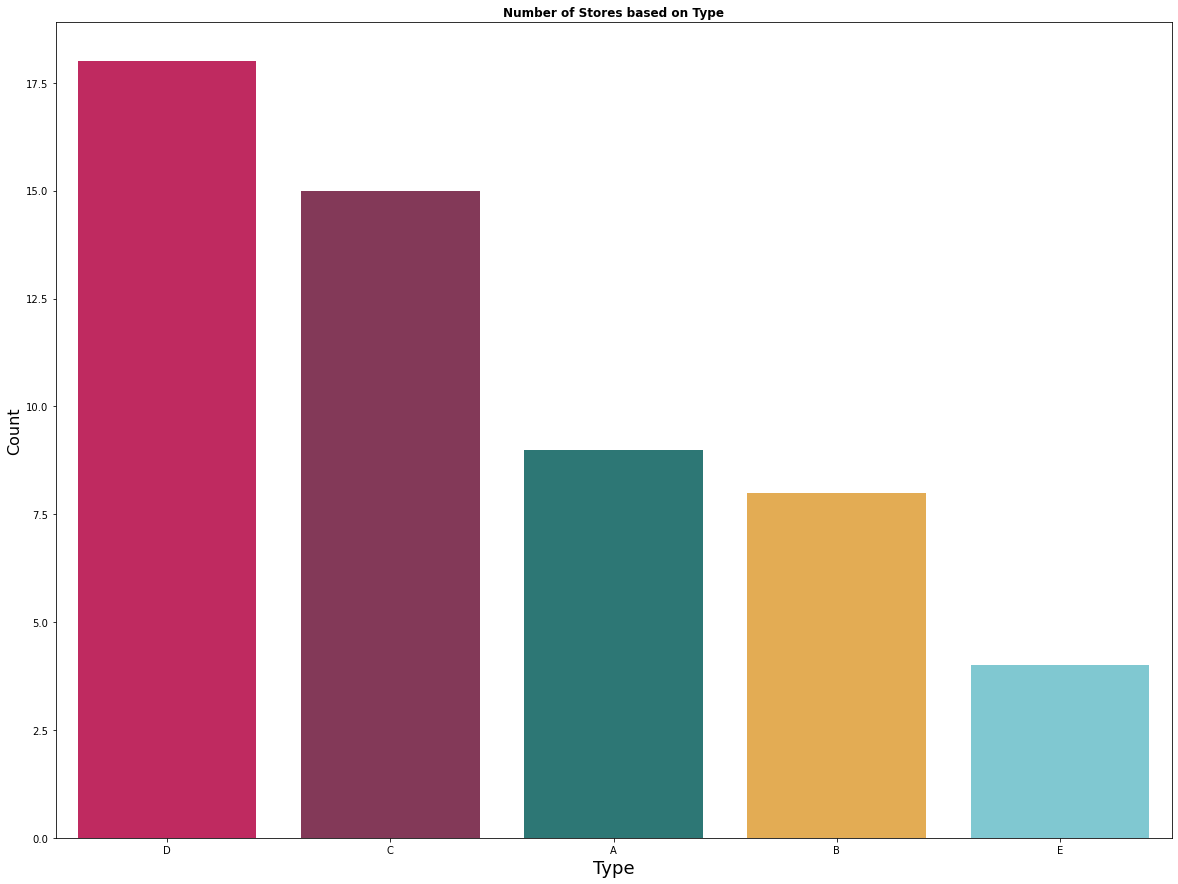

In [6]:
plt.figure(figsize=(20, 15))
sns.countplot(data=df_stores, x='type', order=df_stores.type.value_counts().index,palette=my_color_palette)
plt.title('Number of Stores based on Type',fontweight="bold")
plt.xlabel('Type', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.show()

Text(0.5, 0, 'Count')

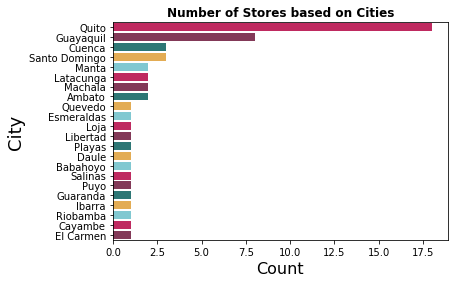

In [7]:
sns.countplot(data=df_stores, y='city', 
              order=df_stores.city.value_counts().index,
              palette=my_color_palette,
              )
plt.title('Number of Stores based on Cities',fontweight="bold")
plt.ylabel('City', fontsize=18)
plt.xlabel('Count', fontsize=16)

In [8]:
train = df_train.merge(df_oil, on='date')
test = df_train.merge(df_oil, on='date') 
    
train = train.merge(df_holiday_events[['date', 'type', 'transferred']], on='date')
train = train.merge(df_stores, on='store_nbr')
train.rename(columns={'type_x':'holiday_type', 'type_y':'store_type'}, inplace=True)
train['Year'] = train.date.dt.year

In [9]:
train['Year'] = train.date.dt.year

train['Month'] = train.date.dt.month
train['Day'] = train.date.dt.day


In [10]:
df_oil.dtypes

date          datetime64[ns]
dcoilwtico           float64
dtype: object

In [11]:
df_holiday_events.dtypes

date           datetime64[ns]
type                   object
locale                 object
locale_name            object
description            object
transferred              bool
dtype: object

In [12]:
train

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,transferred,city,state,store_type,cluster,Year,Month,Day
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0.0,NaN,Holiday,False,Quito,Pichincha,D,13,2013,1,1
1,1,2013-01-01,1,BABY CARE,0.000,0.0,NaN,Holiday,False,Quito,Pichincha,D,13,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.000,0.0,NaN,Holiday,False,Quito,Pichincha,D,13,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.000,0.0,NaN,Holiday,False,Quito,Pichincha,D,13,2013,1,1
4,4,2013-01-01,1,BOOKS,0.000,0.0,NaN,Holiday,False,Quito,Pichincha,D,13,2013,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352831,3000883,2017-08-15,9,POULTRY,438.133,15.0,47.57,Holiday,False,Quito,Pichincha,B,6,2017,8,15
352832,3000884,2017-08-15,9,PREPARED FOODS,154.553,8.0,47.57,Holiday,False,Quito,Pichincha,B,6,2017,8,15
352833,3000885,2017-08-15,9,PRODUCE,2419.729,148.0,47.57,Holiday,False,Quito,Pichincha,B,6,2017,8,15
352834,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,10.0,47.57,Holiday,False,Quito,Pichincha,B,6,2017,8,15


Text(0.5, 0, 'Sales')

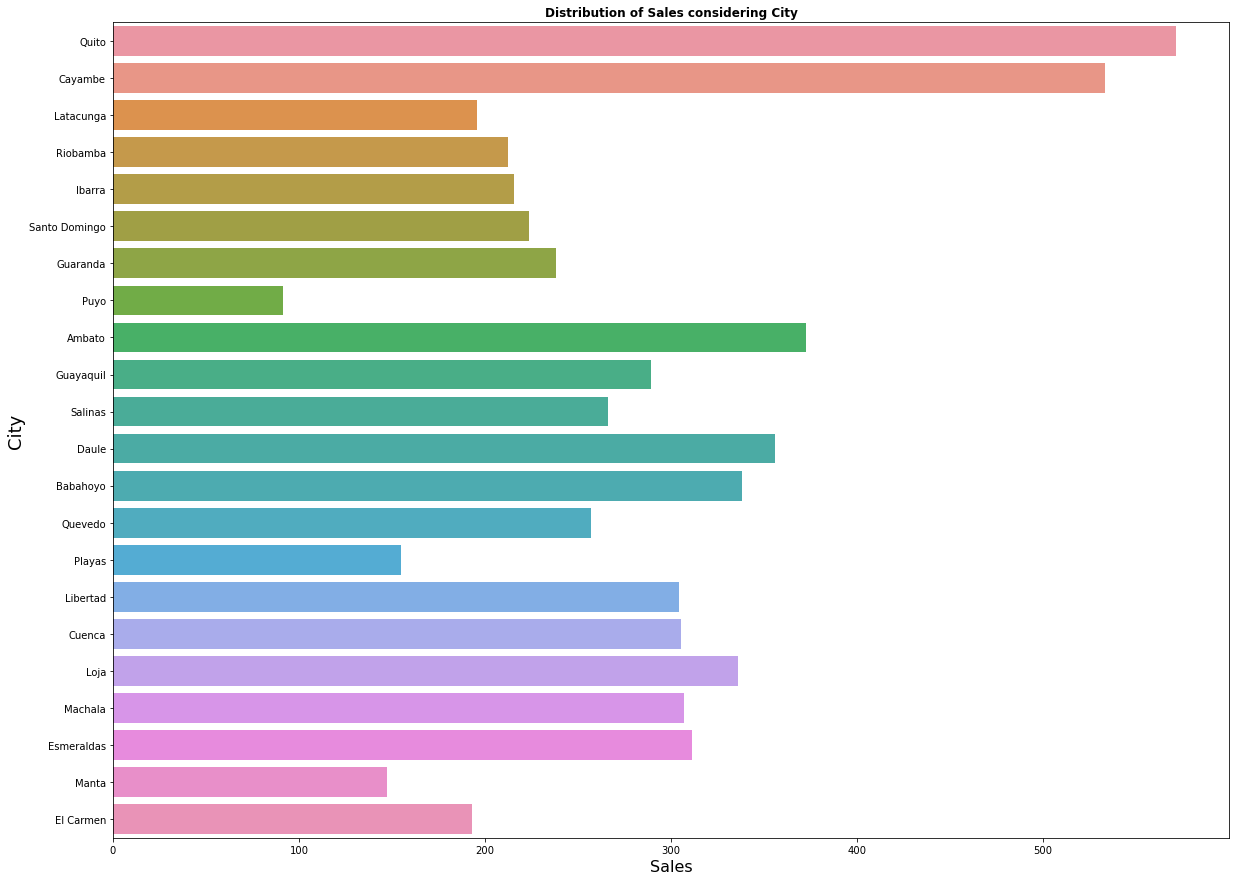

In [13]:
plt.figure(figsize=(20, 15))

sns.barplot(x='sales',y='city',data=train, ci=None)
plt.title('Distribution of Sales considering City',fontweight="bold")
plt.ylabel('City', fontsize=18)
plt.xlabel('Sales', fontsize=16)

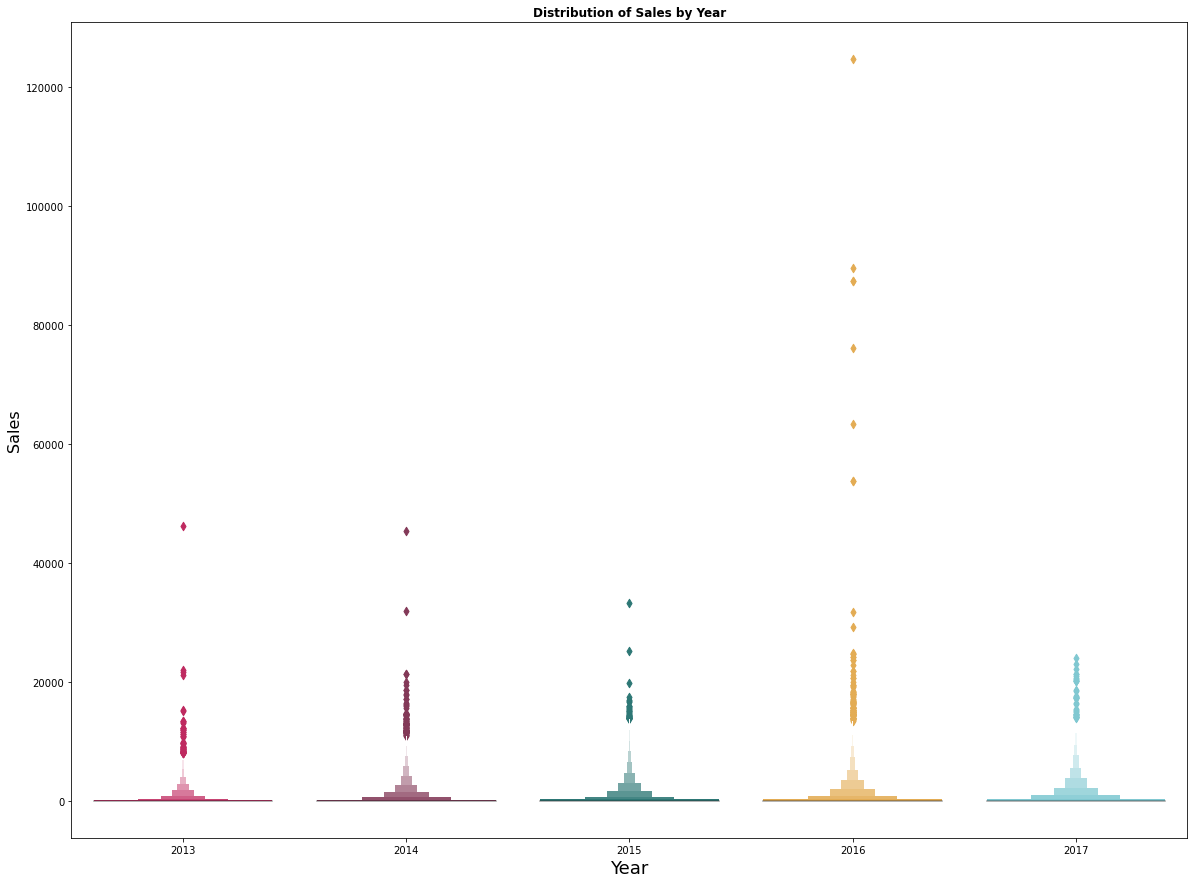

In [14]:
plt.figure(figsize=(20, 15))
sns.boxenplot(x = "Year", y = "sales", 
              data = train,palette=my_color_palette)
plt.title('Distribution of Sales by Year',fontweight="bold")
plt.xlabel('Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.show()

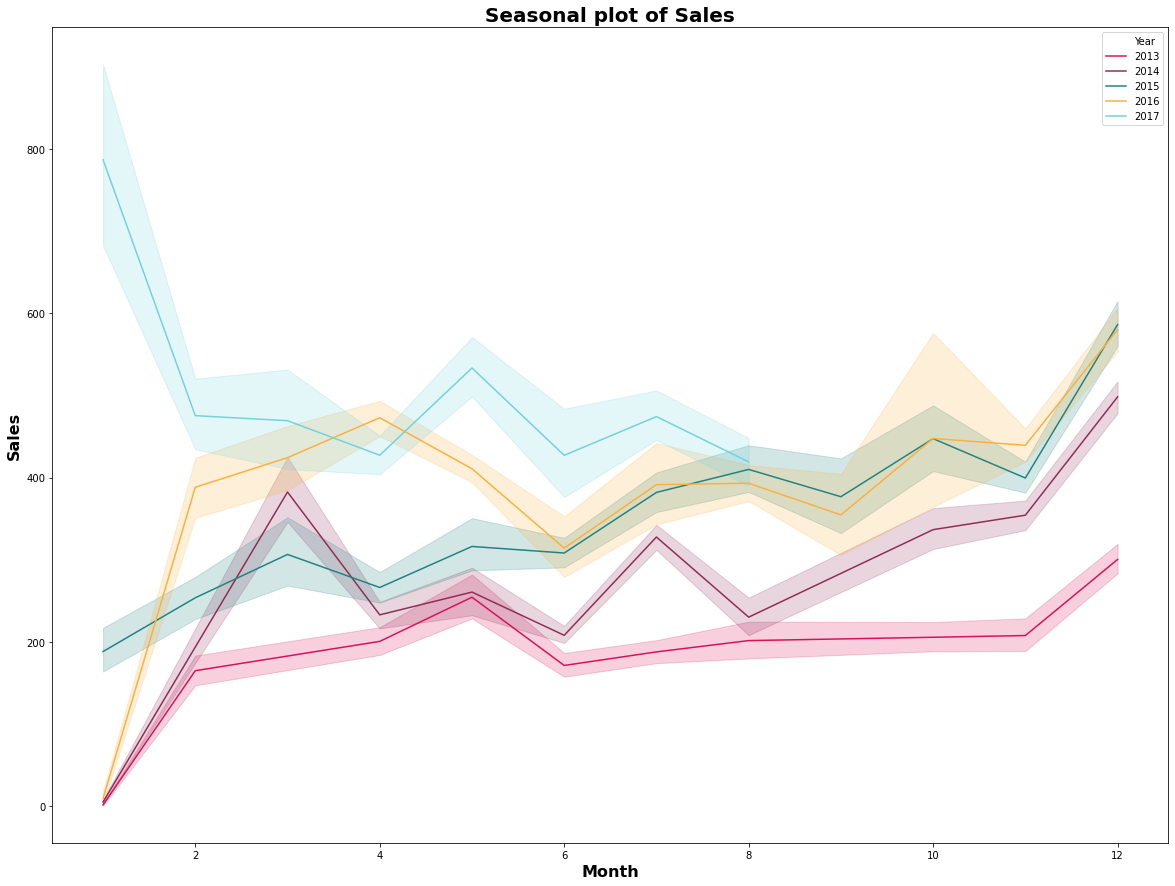

In [15]:
plt.figure(figsize=(20, 15)) 
sns.lineplot(train['Month'], train['sales'], hue=train['Year'], palette=my_color_palette)
plt.title('Seasonal plot of Sales', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
plt.xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
plt.ylabel('Sales', fontsize = 16, fontdict=dict(weight='bold'))
plt.show()

In [16]:
ts=train.groupby(['date'])["sales"].sum()

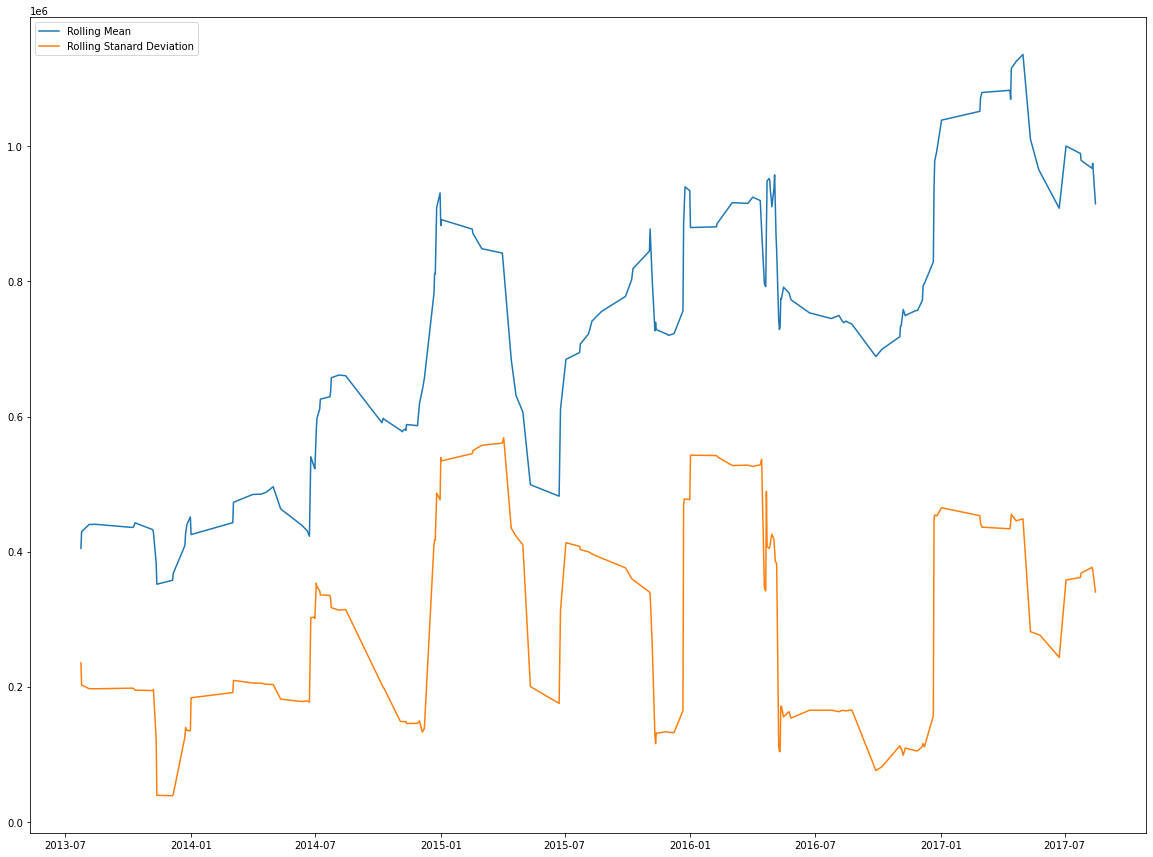

In [17]:
plt.figure(figsize=(20, 15)) 
plt.plot(ts.rolling(window=12,center=False).mean(),label='Rolling Mean');
plt.plot(ts.rolling(window=12,center=False).std(),label='Rolling Stanard Deviation');
plt.legend();

In [18]:
df_train1=pd.read_csv("train.csv")

In [19]:
df_train1.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0.0
4,4,2013-01-01,1,BOOKS,0.0,0.0


In [20]:
dates = df_train1['date'].apply(lambda x: x[:-3]).unique() # chop off the "day" part of the date
all_storesales = {}
for id in range(1,11):
    print('calculating store',id)
    all_storesales[id] = []
    for date in dates:
        # extract the sales data for that store, for that date
        storedata = df_train1[(df_train1['store_nbr'] == id) & (df_train1['date'].apply(lambda x: x[:-3]) == date)]
        storesales = storedata['sales'].sum()
        all_storesales[id].append(storesales)


calculating store 1
calculating store 2
calculating store 3
calculating store 4
calculating store 5
calculating store 6
calculating store 7
calculating store 8
calculating store 9
calculating store 10


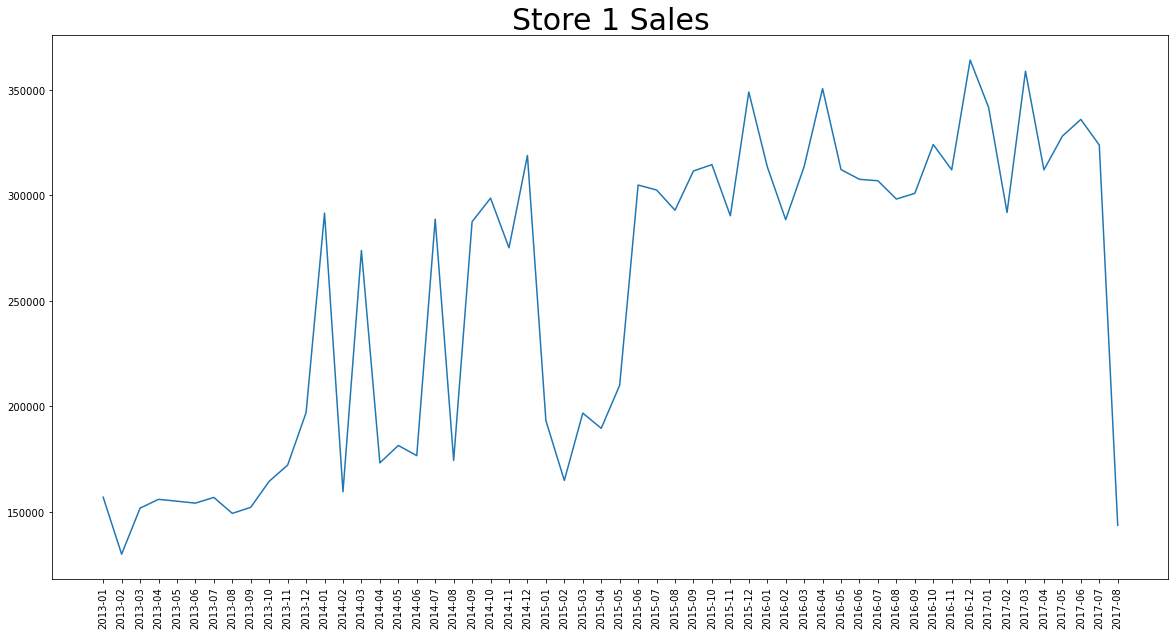

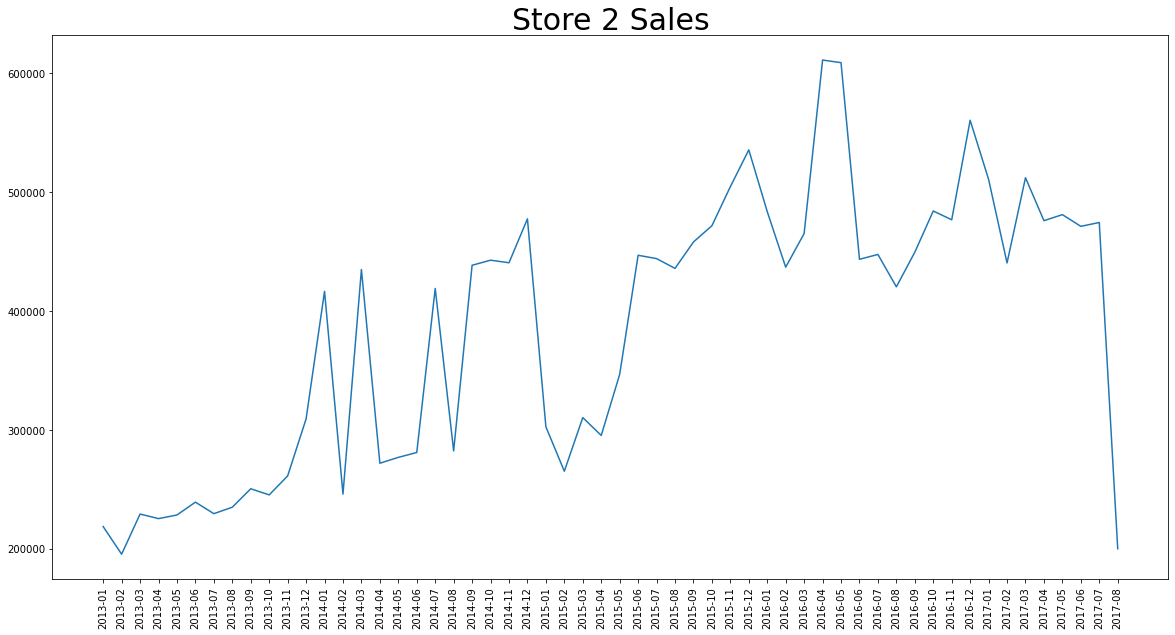

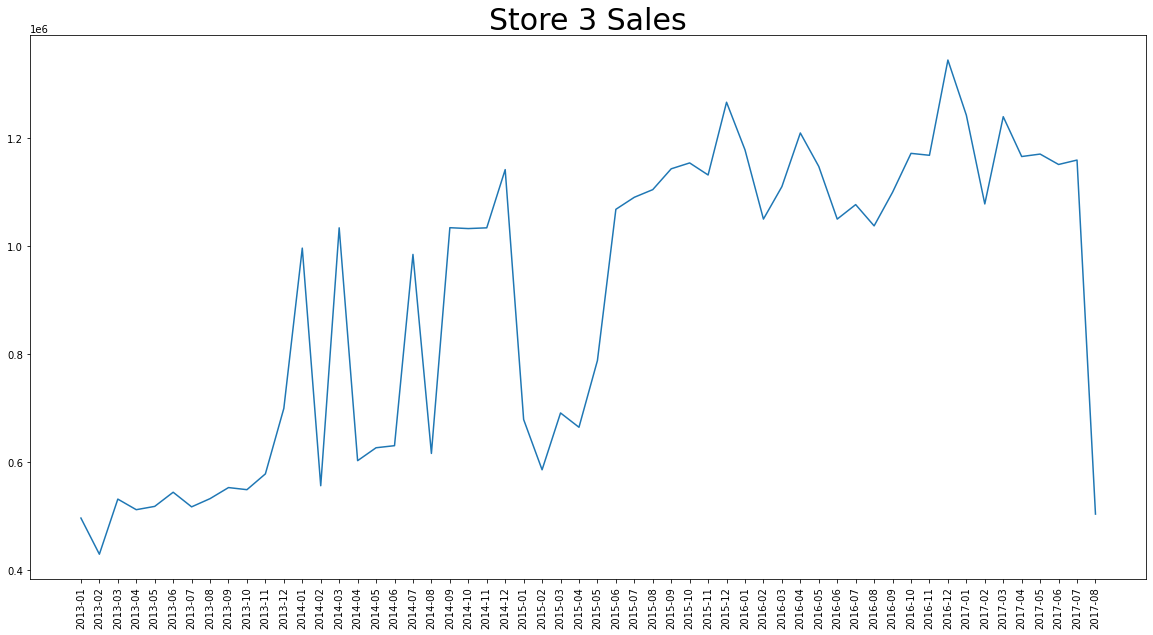

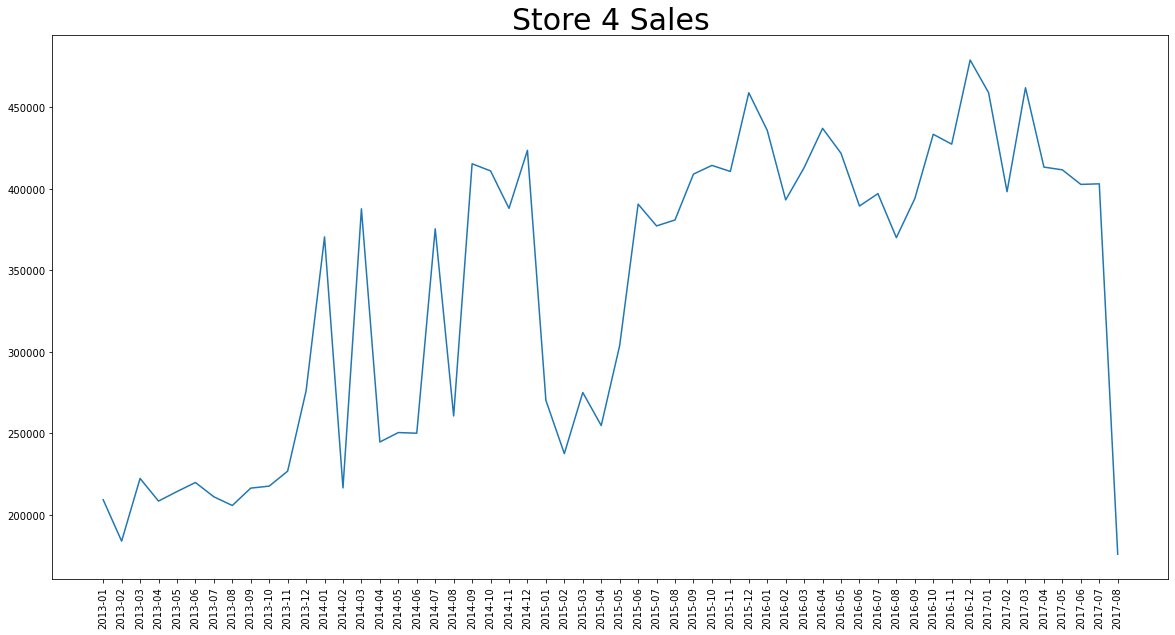

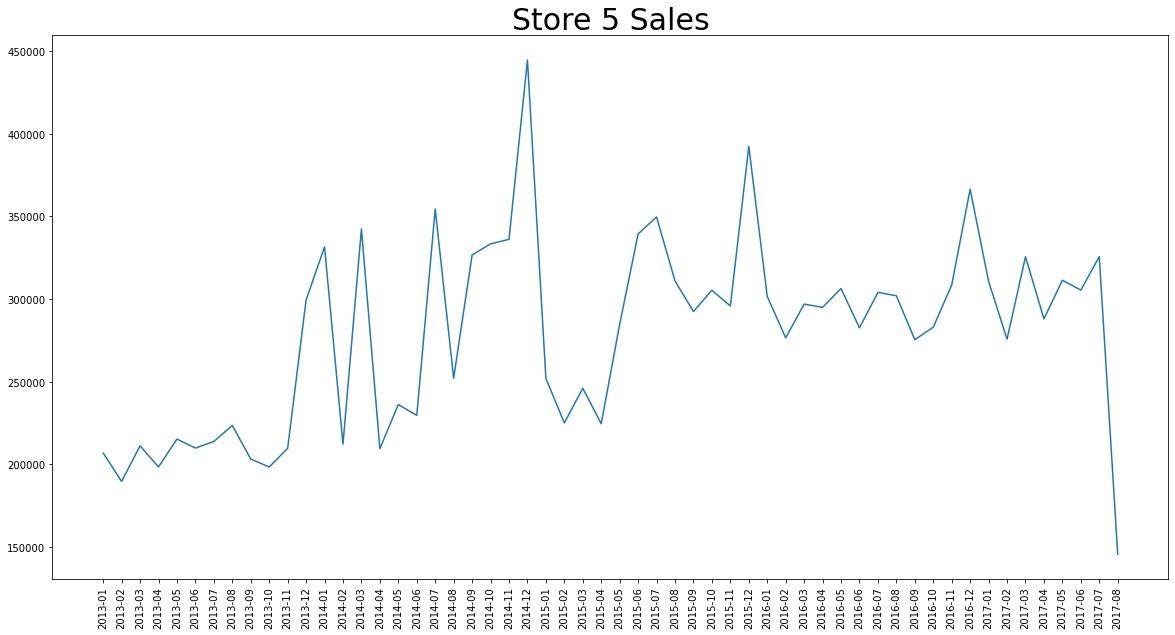

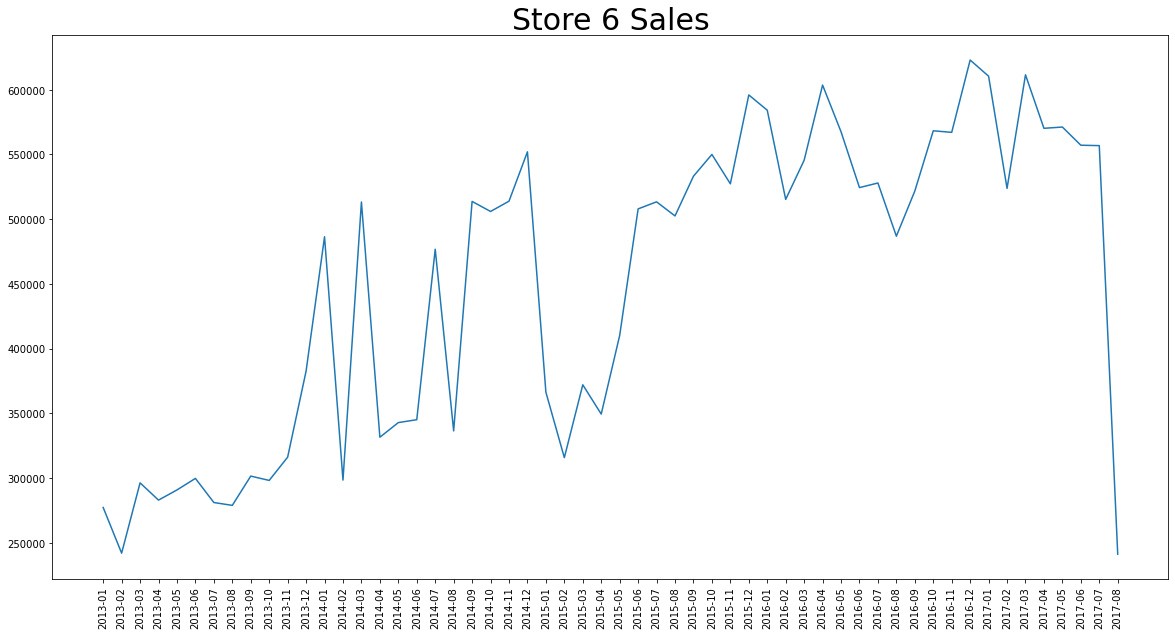

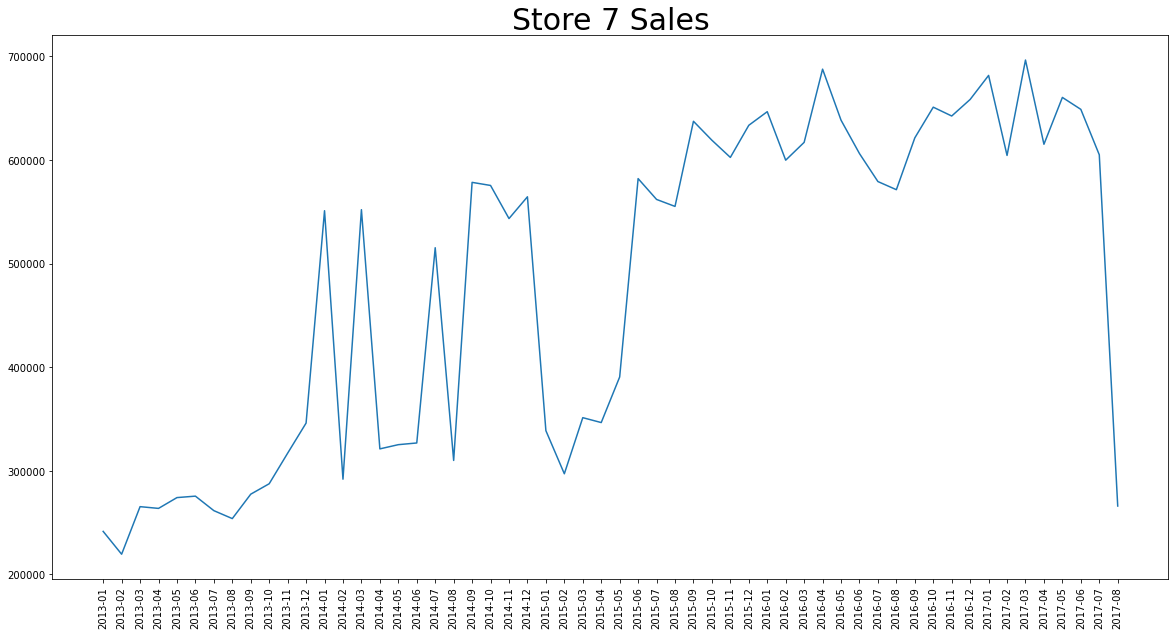

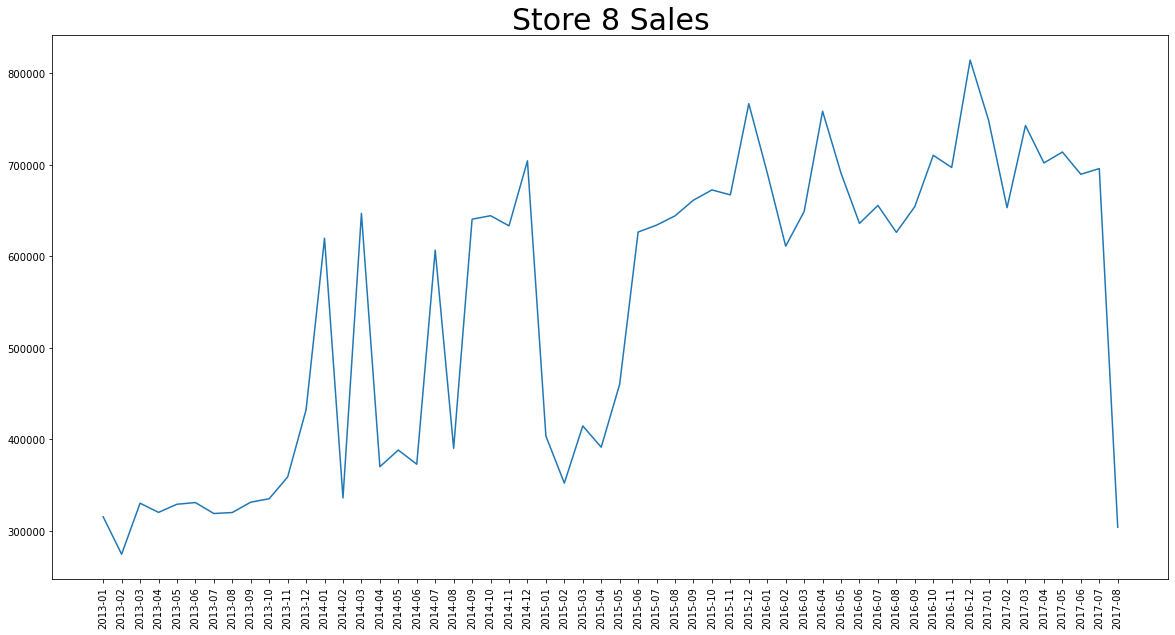

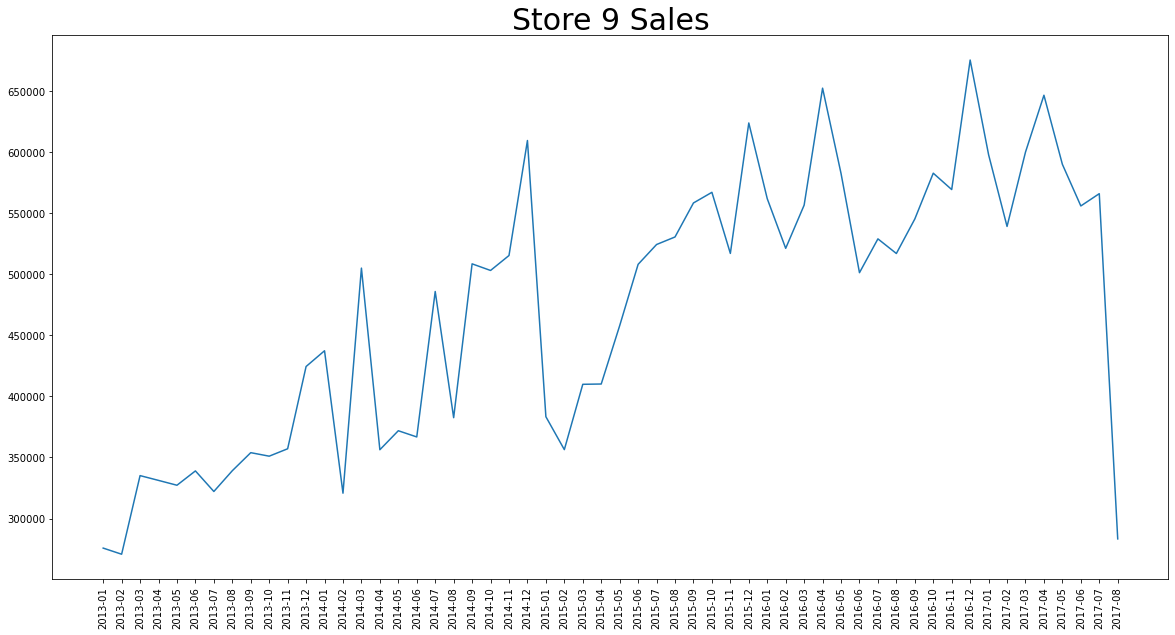

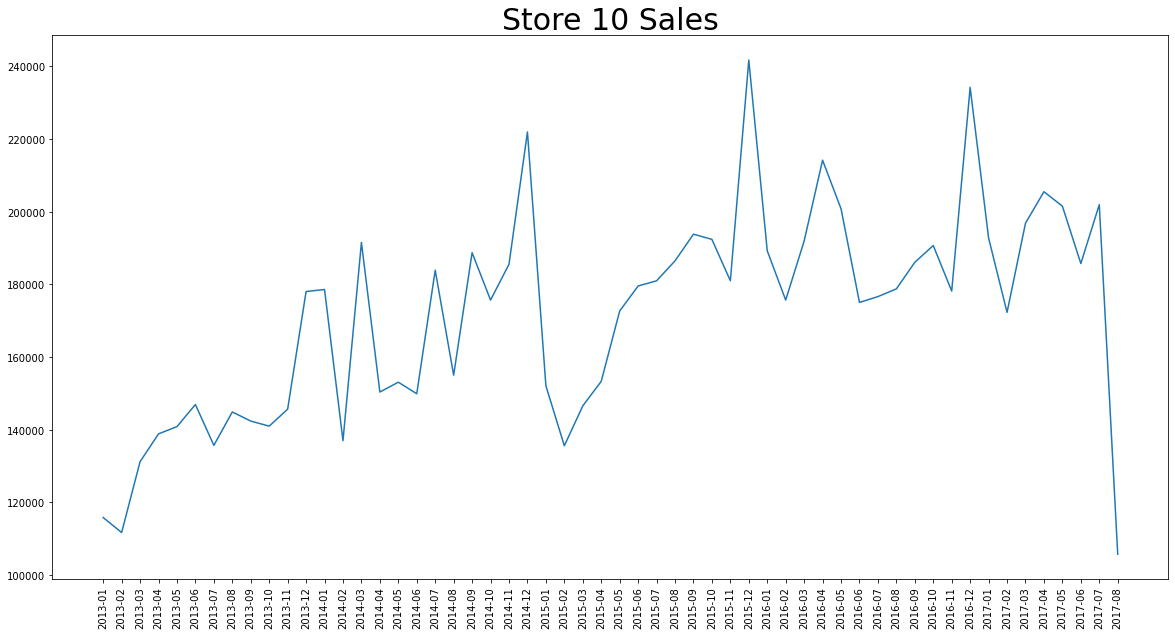

In [21]:
for id in range(1,11):
    plt.figure(figsize=(20,10))
    plt.plot(dates, all_storesales[id])
    plt.title('Store '+str(id)+' Sales', fontsize=30)
    plt.xticks(rotation=90)
    plt.show()

# References: 

- https://en.wikipedia.org/wiki/Time_series

- https://datascienceblog.net/post/machine-learning/forecasting_vs_prediction/

- https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-    70d476bfe775